# Importing modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import operator 
import functools
import re

# Importing Dataset

In [2]:
df_links = pd.read_csv('links.csv')
df_movies = pd.read_csv('movies.csv')
df_ratings = pd.read_csv('ratings.csv')
df_tags = pd.read_csv('tags.csv')

In [3]:
df_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [4]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
df_tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


# Counting Nan values per dataset

In [7]:
print("Movies")
print(df_movies.isna().sum())
print("\nLinks")
print(df_links.isna().sum())
print("\nRatings")
print(df_ratings.isna().sum())
print("\nTags")
print(df_tags.isna().sum())

Movies
movieId    0
title      0
genres     0
dtype: int64

Links
movieId    0
imdbId     0
tmdbId     8
dtype: int64

Ratings
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Tags
userId       0
movieId      0
tag          0
timestamp    0
dtype: int64


tmbdbId Column in Links dataset has 8 Nan values, Replacing Nan with 0

In [8]:
df_links.fillna(0,inplace=True)

# Plotting correlations between features

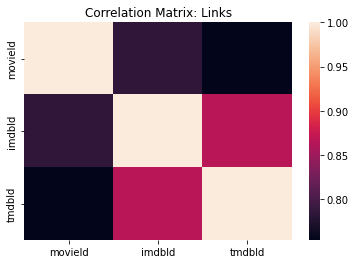

In [9]:
sns.heatmap(df_links.corr())
plt.title("Correlation Matrix: Links")
plt.show()

no correlation between features in movies dataset

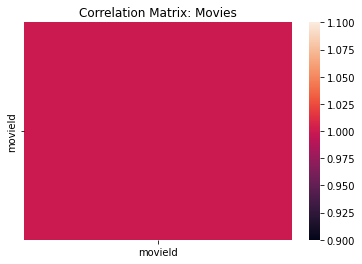

In [10]:
sns.heatmap(df_movies.corr())
plt.title("Correlation Matrix: Movies")
plt.show()

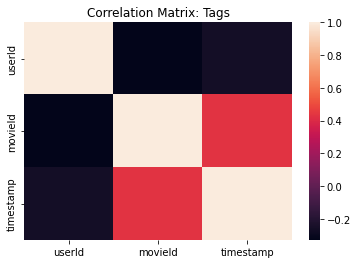

In [11]:
sns.heatmap(df_tags.corr())
plt.title("Correlation Matrix: Tags")
plt.show()

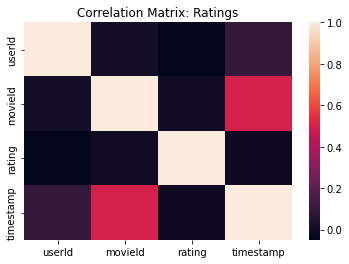

In [12]:
sns.heatmap(df_ratings.corr())
plt.title("Correlation Matrix: Ratings")
plt.show()

# Average Ratings

In [13]:
average_ratings = df_ratings.groupby("movieId").mean()['rating']
average_ratings = pd.merge(average_ratings,df_movies,on='movieId')[['title','rating']]
average_ratings.head()

,title,rating
0,Toy Story (1995),3.920930
1,Jumanji (1995),3.431818
2,Grumpier Old Men (1995),3.259615
3,Waiting to Exhale (1995),2.357143
4,Father of the Bride Part II (1995),3.071429


Top 4 Movies Based on Average Rating

In [14]:
average_ratings.nlargest(n=4,columns='rating')

,title,rating
48,Lamerica (1994),5.0
87,Heidi Fleiss: Hollywood Madam (1995),5.0
121,"Awfully Big Adventure, An (1995)",5.0
405,Live Nude Girls (1995),5.0


Bottom 4 Movies Based on Average Rating

In [15]:
average_ratings.nsmallest(n=4,columns='rating')

,title,rating
2685,Gypsy (1962),0.5
2929,"Killer Shrews, The (1959)",0.5
3023,Horrors of Spider Island (Ein Toter Hing im Ne...,0.5
3230,Baby Boy (2001),0.5


# Plot of Frequency of Ratings

4 is the most frequent rating followed by 3 and 5

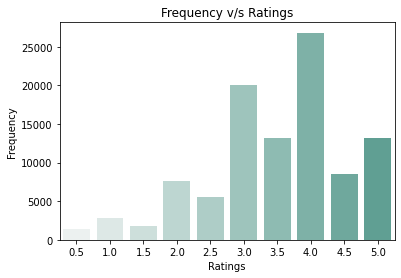

In [16]:
rating_counts = df_ratings['rating'].value_counts()
sns.barplot(x = rating_counts.index, y = rating_counts.values,palette="light:#5A9")
plt.xlabel("Ratings")
plt.ylabel("Frequency")
plt.title("Frequency v/s Ratings")
plt.show()

# Movie Counts With Year

Highest number of movies were released in 2002

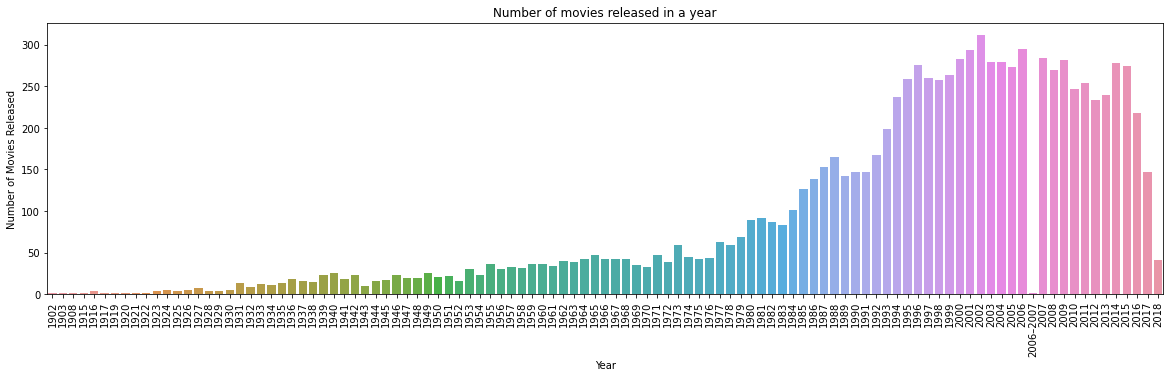

In [17]:
movies_with_year = df_movies.copy()
movies_with_year['Year'] = df_movies['title'].str.extract('.*\((.*)\).*')
year_movie_counts = movies_with_year['Year'].value_counts().sort_index()
plt.figure(figsize=(20,5))
sns.barplot(x=year_movie_counts.index,y=year_movie_counts.values)
plt.xticks(rotation=90)
plt.xlabel("Year")
plt.ylabel("Number of Movies Released")
plt.title("Number of movies released in a year")
plt.show()

# Genres

In [18]:
genres = list(set(functools.reduce(operator.concat,df_movies['genres'].str.split("|"))))
genres.sort()
print(genres)
df_genres = df_movies['genres'].str.get_dummies(sep='|')

['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']


Bar plot showing number of movies for each genre

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64


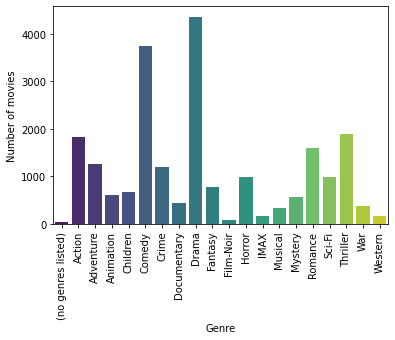

In [19]:
genre_movie_counts = df_genres.sum()
print(genre_movie_counts)

sns.barplot(x = genre_movie_counts.index, y = genre_movie_counts.values,palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Genre")
plt.ylabel("Number of movies")
plt.show()

3 genres with most movies

In [20]:
genre_movie_counts.nlargest(n=3)

Drama       4361
Comedy      3756
Thriller    1894
dtype: int64

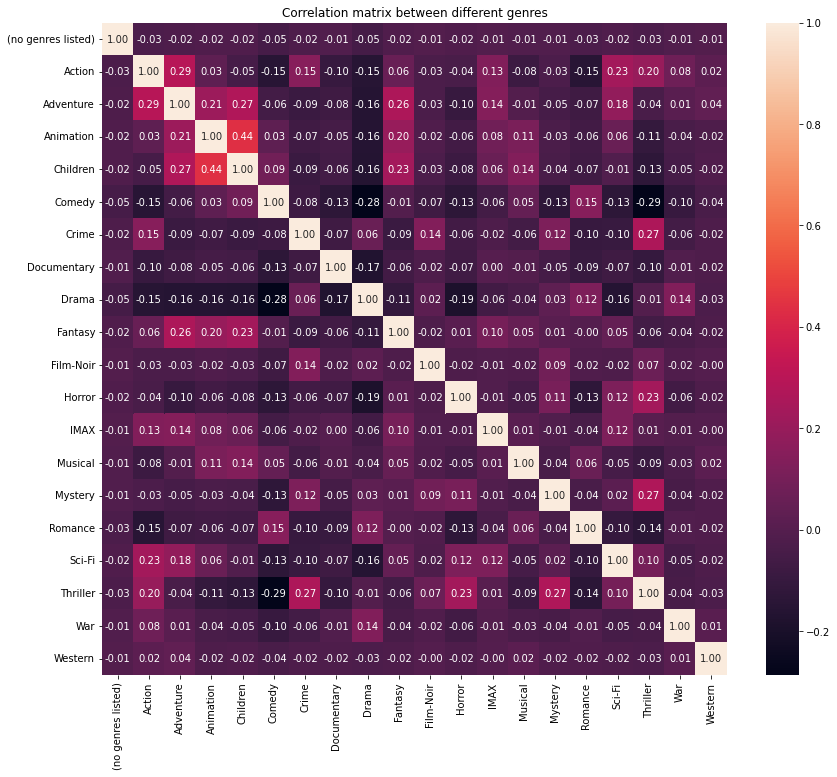

In [21]:
plt.figure(figsize=(14,12))
sns.heatmap(df_genres.corr(),annot=True,fmt='.2f')
plt.title("Correlation matrix between different genres")
plt.show()

# Average rating for each genre

In [22]:
average_ratings = df_ratings.groupby("movieId").mean()['rating']
genres_and_ratings = pd.merge(average_ratings,df_movies,on='movieId')[['rating','genres']]

genre_average_rating = {}
for genre in genres:
  genre_average_rating[genre] = genres_and_ratings[genres_and_ratings['genres'].str.contains(re.escape(genre))]['rating'].mean()

genre_average_rating = pd.DataFrame.from_records(genre_average_rating,index=[0]).T

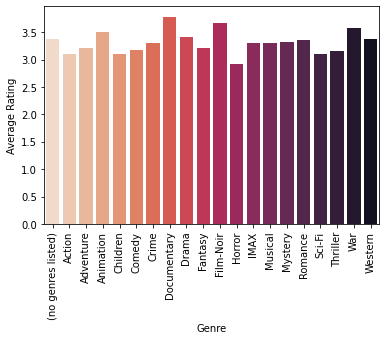

In [23]:
sns.barplot(x = genre_average_rating.index, y = genre_average_rating[0].values,palette="rocket_r")
plt.xticks(rotation=90)
plt.xlabel("Genre")
plt.ylabel("Average Rating")
plt.show()

3 genres with highest ratings

In [24]:
genre_average_rating.nlargest(n=3,columns=0)

,0
Documentary,3.781682
Film-Noir,3.670471
War,3.571655


3 genres with lowest ratings

In [25]:
genre_average_rating.nsmallest(n=3,columns=0)

,0
Horror,2.918965
Action,3.094498
Sci-Fi,3.102637
